# CNOT gate

### Import section

In [5]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import StatevectorSimulator, QasmSimulator, UnitarySimulator
import numpy as np
from math import pi

%config InlineBackend.figure_format = 'svg' # Makes the images look nice

### Create  circuit

In [6]:
n = 2
n_q = n
n_b = n

### Bell $|\Phi^+\rangle = \frac{|00\rangle +|11\rangle}{\sqrt{2}}$

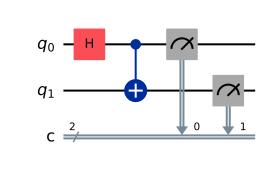

In [7]:
qc = QuantumCircuit(n_q,n_b)

qc.h(0)
qc.cx(0,1)
#qc.h(0)
#qc.h(1)
qc.measure(0,0)
qc.measure(1,1)

display(qc.draw(output='mpl'))

# backend = StatevectorSimulator()
# backend = UnitarySimulator()
# job = backend.run(qc).result()

# display(job.get_statevector())
# display(np.round(job.get_unitary(), 3))

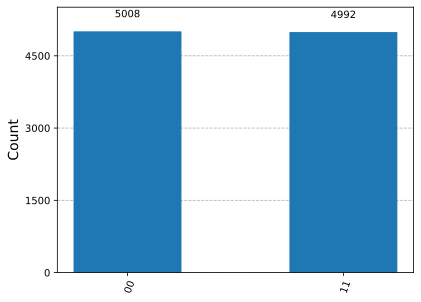

In [22]:
backend = QasmSimulator()
counts = backend.run(qc,shots = 10000).result().get_counts()
plot_histogram(counts)

### Bell $|\Phi^-\rangle = \frac{|00\rangle -|11\rangle}{\sqrt{2}}$

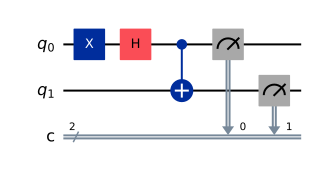

Statevector([ 0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
             -1.+1.2246468e-16j],
            dims=(2, 2))


In [26]:
qc = QuantumCircuit(n_q,n_b)

qc.x(0)
qc.h(0)
qc.cx(0,1)
#qc.h(0)
#qc.h(1)
qc.measure(0,0)
qc.measure(1,1)

display(qc.draw(output='mpl'))

backend = StatevectorSimulator()
job = backend.run(qc).result()
display(job.get_statevector())

In [45]:
# show that by increasing Nshots you converge to the expected result
Nshots = 1024*8
backend = QasmSimulator()
counts = backend.run(qc,shots = Nshots).result().get_counts()
plot_histogram(counts)

display(counts['00'] / Nshots)
display(counts['11'] / Nshots)

0.5

0.5

### Bell $|\Psi^+\rangle = \frac{|01\rangle + |10\rangle}{\sqrt{2}}$

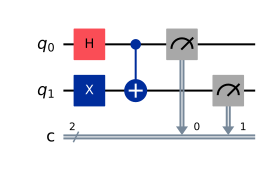

In [46]:
qc = QuantumCircuit(n_q,n_b)

qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)

qc.draw(output='mpl')

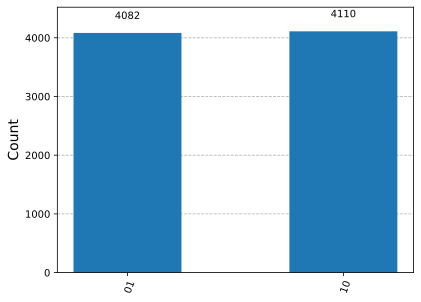

In [51]:
Nshots = 1024*8
backend = QasmSimulator()
counts = backend.run(qc,shots = Nshots).result().get_counts()
plot_histogram(counts)

### Bell $|\Psi^-\rangle = \frac{|01\rangle - |10\rangle}{\sqrt{2}}$

Statevector([ 0.+0.j, -1.+0.j,  0.+0.j, -0.+0.j],
            dims=(2, 2))


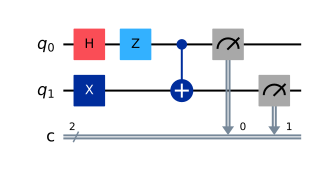

In [59]:
qc = QuantumCircuit(n_q,n_b)

# qc.x(0)
qc.h(0)
qc.z(0)
qc.x(1)
qc.cx(0,1)

qc.measure(0,0)
qc.measure(1,1)

backend = StatevectorSimulator()
job = backend.run(qc).result()
display(job.get_statevector())

qc.draw(output='mpl')

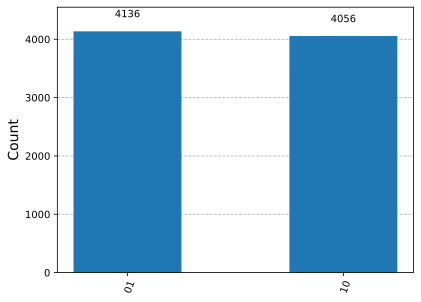

In [60]:
Nshots = 1024*8
backend = QasmSimulator()
counts = backend.run(qc,shots = Nshots).result().get_counts()
plot_histogram(counts)

# CNOT on X eigenstates

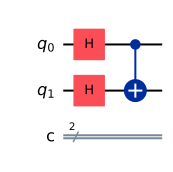

In [65]:
qc = QuantumCircuit(n_q,n_b)

qc.h(0)
qc.h(1)
qc.cx(0,1)
#qc.measure(0,0)
#qc.measure(1,1)

qc.draw(output='mpl')

### Calculate vector state (before measuring)

In [67]:
statevector_backend = StatevectorSimulator()
final_state = statevector_backend.run(qc).result().get_statevector()
final_state

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


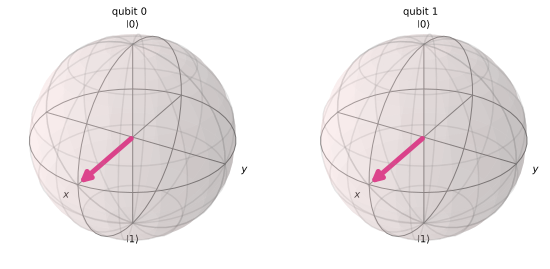

In [69]:
plot_bloch_multivector(final_state)

#### Both qubits are +1 eigenstates of X: $|++\rangle$ : no change after application of CNOT

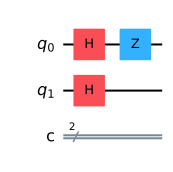

Statevector([ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
            dims=(2, 2))


In [82]:
qc = QuantumCircuit(n_q,n_b)

qc.h(0)
qc.h(1)
qc.z(0)
# qc.z(1)

display(qc.draw('mpl'))

final_state = statevector_backend.run(qc).result().get_statevector()
final_state

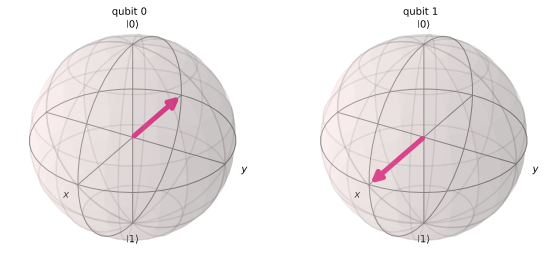

In [83]:
plot_bloch_multivector(final_state)

#### Qubits prepared in state $|+-\rangle$

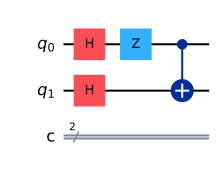

In [84]:
qc.cx(0,1)
qc.draw('mpl')

In [4]:
final_state = statevector_backend.run(qc).result().get_statevector()
final_state

NameError: name 'statevector_backend' is not defined

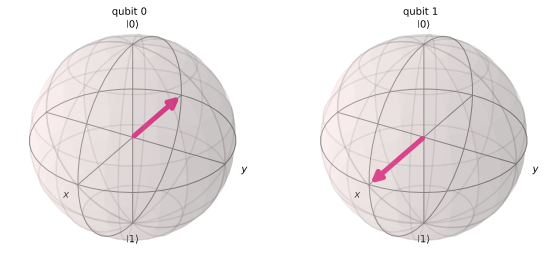

In [86]:
plot_bloch_multivector(final_state)

#### CNOT: $|+-\rangle \rightarrow |--\rangle$ 

In [87]:
qc = QuantumCircuit(2,2)

# init in 01
#qc.x(1)

# CX con scambiati control e target
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)

qc.draw('mpl')

qc2 = QuantumCircuit(2,2)
qc2.cx(1,0)

unitary_simulator = UnitarySimulator() 
final_state = unitary_simulator.run(qc).result().get_unitary() - unitary_simulator.run(qc2).result().get_unitary()
np.round(np.real(final_state),2)

array([[-0.,  0., -0.,  0.],
       [ 0., -0.,  0., -0.],
       [-0.,  0.,  0., -0.],
       [ 0., -0., -0., -0.]])

## CNOT identities

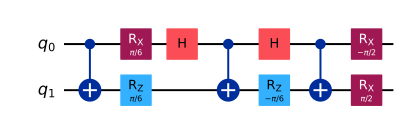

[[ 0.    0.   -0.    0.71]
 [ 0.    0.49  0.22  0.  ]
 [-0.    0.22  0.49  0.  ]
 [ 0.71 -0.    0.    0.  ]]
[[-0.71 -0.   -0.    0.  ]
 [ 0.   -0.84  0.13  0.  ]
 [-0.    0.13 -0.84  0.  ]
 [ 0.   -0.    0.   -0.71]]
[[ 0.  -0.71j  0.  -0.j   -0.  -0.j    0.71+0.j  ]
 [ 0.  +0.j    0.49-0.84j  0.22+0.13j  0.  +0.j  ]
 [-0.  -0.j    0.22+0.13j  0.49-0.84j  0.  +0.j  ]
 [ 0.71+0.j   -0.  -0.j    0.  +0.j    0.  -0.71j]]


┌─────────┐┌───┐        ┌───┐         ┌──────────┐
q_0: ──■──┤ Rx(π/6) ├┤ H ├──■─────┤ H ├──────■──┤ Rx(-π/2) ├
     ┌─┴─┐├─────────┤└───┘┌─┴─┐┌──┴───┴───┐┌─┴─┐├─────────┬┘
q_1: ┤ X ├┤ Rz(π/6) ├─────┤ X ├┤ Rz(-π/6) ├┤ X ├┤ Rx(π/2) ├─
     └───┘└─────────┘     └───┘└──────────┘└───┘└─────────┘

In [56]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
qc = QuantumCircuit(qreg_q)

q0=0
q1=1
parameter = np.pi/3

qc.cx(q0, q1)
qc.rx(parameter/2, q0)
qc.h(q0)
qc.rz(parameter/2, q1)
qc.cx(q0, q1) 
qc.h(q0)
qc.rz(-parameter/2, q1)
qc.cx(0,1)
qc.rx(-np.pi/2, q0)
qc.rx(np.pi/2, q1)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()*np.exp(-1j*np.arctan(0.43/0.75))

print(np.round(np.real(U),2))
print(np.round(np.imag(U),2))

print(np.round(U,2))

qc.draw()

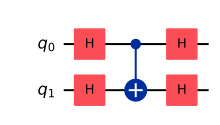

[[ 1. -0. -0. -0.]
 [-0.  1. -0. -0.]
 [-0. -0. -0.  1.]
 [-0. -0.  1. -0.]]


In [60]:
qc = QuantumCircuit(n_q)

qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(np.round(np.real(U),2))

## Other C-U gates

### Preliminaries

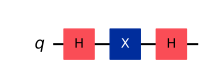

[[ 1.  0.]
 [ 0. -1.]]


In [61]:
qc = QuantumCircuit(1)

qc.h(0)
qc.x(0)
qc.h(0)

#qc.u3(pi/2,0,0,0)
#qc.x(0)
#qc.u3(-pi/2,0,0,0)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(np.real(U))

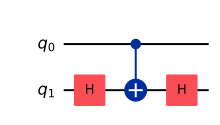

[[ 1.  0.  0.  0.]
 [ 0.  1.  0. -0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]


In [63]:
qc = QuantumCircuit(2)

qc.h(1)
qc.cx(0,1)
qc.h(1)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(np.round(np.real(U),2))

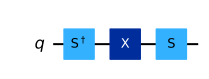

[[ 0. -1.]
 [ 1.  0.]]


In [65]:
qc = QuantumCircuit(1)

qc.sdg(0)
qc.x(0)
qc.s(0)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(np.imag(U))

### Controlled-Z

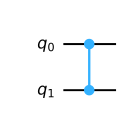

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [-0. -0. -0. -1.]]


In [67]:
qc = QuantumCircuit(n_q)

phi = pi;
qc.cz(0, 1)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(np.real(U))

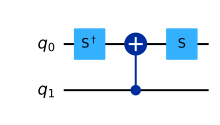

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
          [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [68]:
qc = QuantumCircuit(n_q)

# equivalent to Hadamard
qc.sdg(0)
qc.cx(1,0)
qc.s(0)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(U)

### C-$R_y(\theta)$

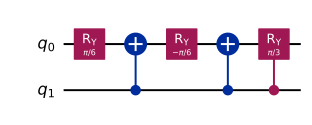

AerError: 'unknown instruction: cry'

In [76]:
qc = QuantumCircuit(n_q)

theta = pi/3
qc.ry(theta/2,0)
qc.cx(1,0)
qc.ry(-theta/2,0)
qc.cx(1,0)
#qc.cry(theta,1,0)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(np.real(U))

### C-$R_z(\theta)$

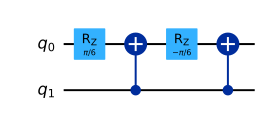

Operator([[1.       +0.j , 0.       +0.j , 0.       +0.j , 0.       +0.j ],
          [0.       +0.j , 1.       +0.j , 0.       +0.j , 0.       +0.j ],
          [0.       +0.j , 0.       +0.j , 0.8660254-0.5j, 0.       +0.j ],
          [0.       +0.j , 0.       +0.j , 0.       +0.j , 0.8660254+0.5j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [79]:
qc = QuantumCircuit(n_q)

theta = pi/3
qc.rz(theta/2,0)
qc.cx(1,0)
qc.rz(-theta/2,0)
qc.cx(1,0)
#qc.crz(-theta,1,0)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(U)

## SWAP gate

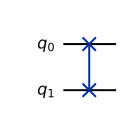

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [80]:
qc = QuantumCircuit(2)

qc.swap(0,1)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(np.real(U))

### Decomposition in CNOTs

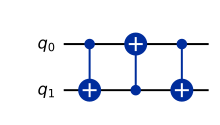

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [81]:
qc = QuantumCircuit(2)

qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(np.real(U))

### This other circuit produces the same effect (SWAP is symmetric)

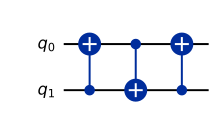

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [82]:
qc = QuantumCircuit(2)

qc.cx(1,0)
qc.cx(0,1)
qc.cx(1,0)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(np.real(U))

## CNOT between distant qubits

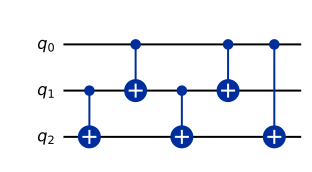

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [83]:
qc = QuantumCircuit(3)

c=0
a=1
t=2

qc.cx(a,t)
qc.cx(c,a)
qc.cx(a,t)
qc.cx(c,a)

#qc.swap(0,1)
#qc.cx(1,2)
#qc.swap(0,1)
qc.cx(0,2)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(np.real(U))

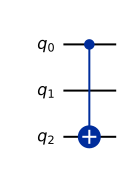

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]


In [84]:
qc = QuantumCircuit(3)

c=0
a=1
t=2

qc.cx(c,t)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(np.real(U))

## Toffoli

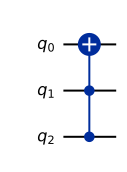

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]


In [85]:
qc = QuantumCircuit(3)

qc.ccx(2,1,0)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(np.real(U))

### Decomposition in CNOTs

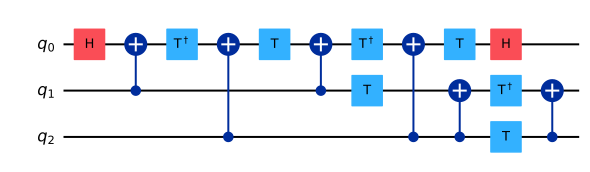

[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1. -0.]]


In [86]:
qc = QuantumCircuit(3)

qc.h(0)
qc.cx(1,0)
qc.tdg(0)
qc.cx(2,0)
qc.t(0)
qc.cx(1,0)
qc.tdg(0)
qc.cx(2,0)
qc.t(0)
qc.t(1)
qc.cx(2,1)
qc.h(0)
qc.t(2)
qc.tdg(1)
qc.cx(2,1)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(np.round(np.real(U),2))

#### Exercise: find an alternative decomposition using CNOTs and C-W, with $W = \sqrt{X}$ 

#### Exercise: find a similar decomposition for a CC-U gate 